### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [35]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv(r'C:\Users\aefim\github\Start_ML\large\lesson_7\processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [36]:
initial_data = pd.read_csv(r'C:\Users\aefim\github\Start_ML\large\lesson_7\taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [37]:
# Проверка, что количество строк в исходных и обработанных данных совпадает
initial_data.shape[0] == processed_data.shape[0]

True

In [38]:
### Вернем в датасет колонку pickup_datetime

# Сделаем индексами id
initial_data = initial_data.set_index('id')

# Объединим датасеты
processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [39]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [40]:
# Преобразуем колонку pickup_datetime в формат datetime
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

# Добавим колонки с датой, днем недели, часом и месяцем
processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [41]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

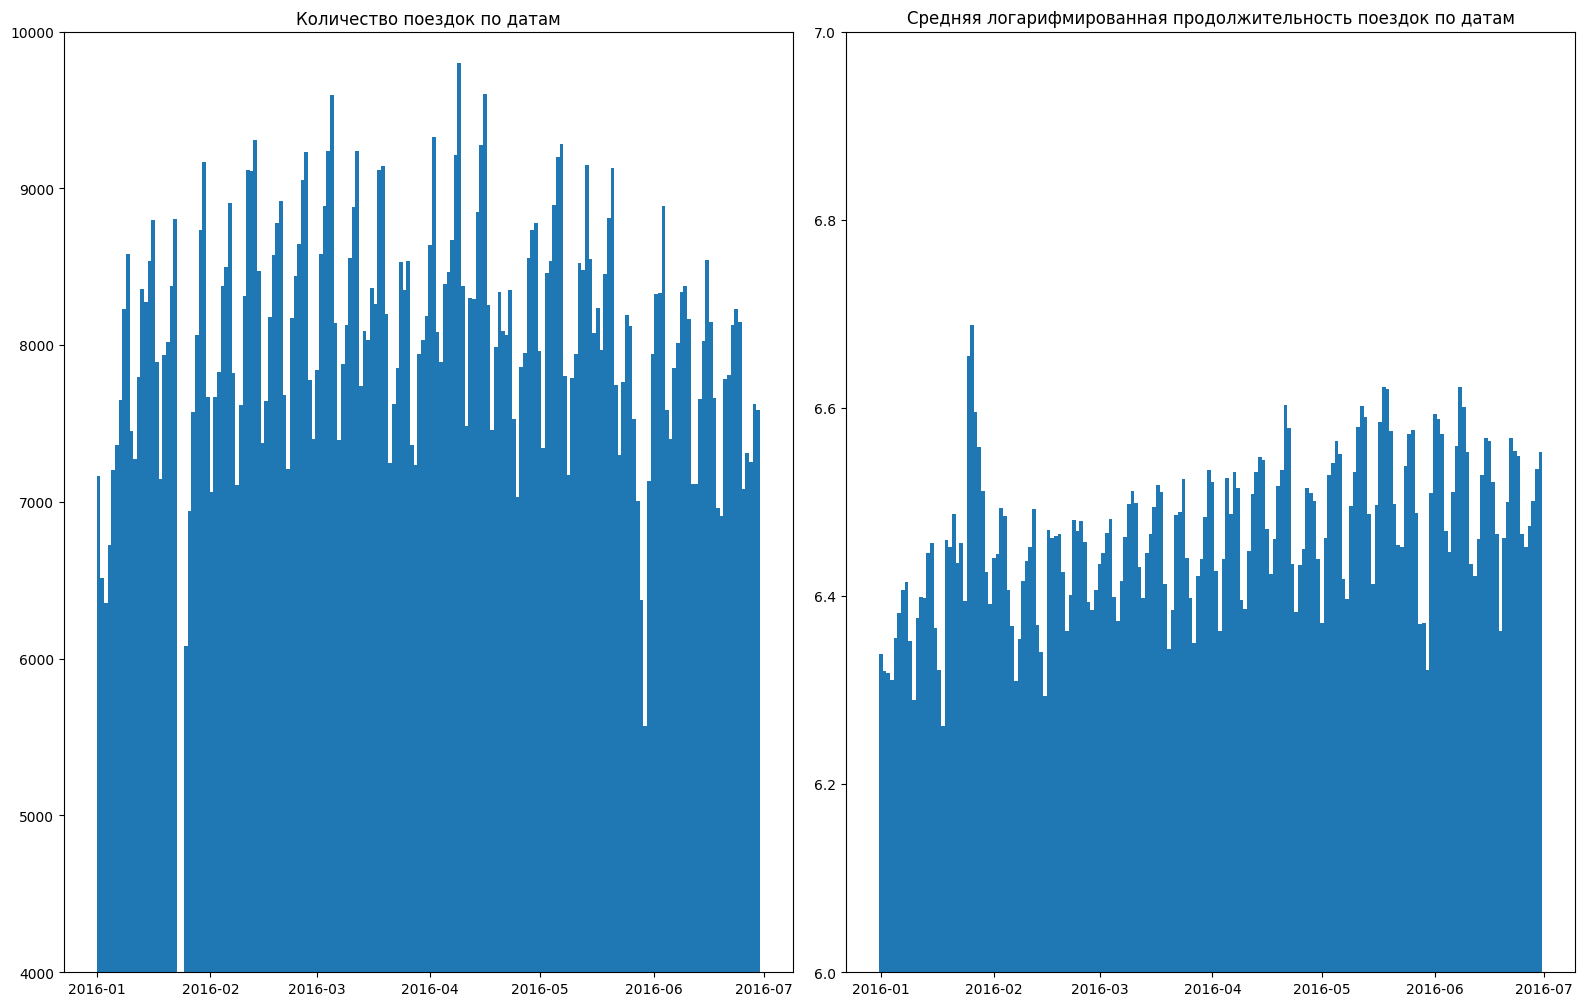

In [43]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


### Количество поездок/Средняя продолжительность поездки vs День недели

C:\Users\aefim\AppData\Local\Temp\ipykernel_29620\3637031108.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axs[0].plot(processed_data.groupby('day_of_week').mean()['log_trip_duration'], label='Средняя продолжительность поездки')


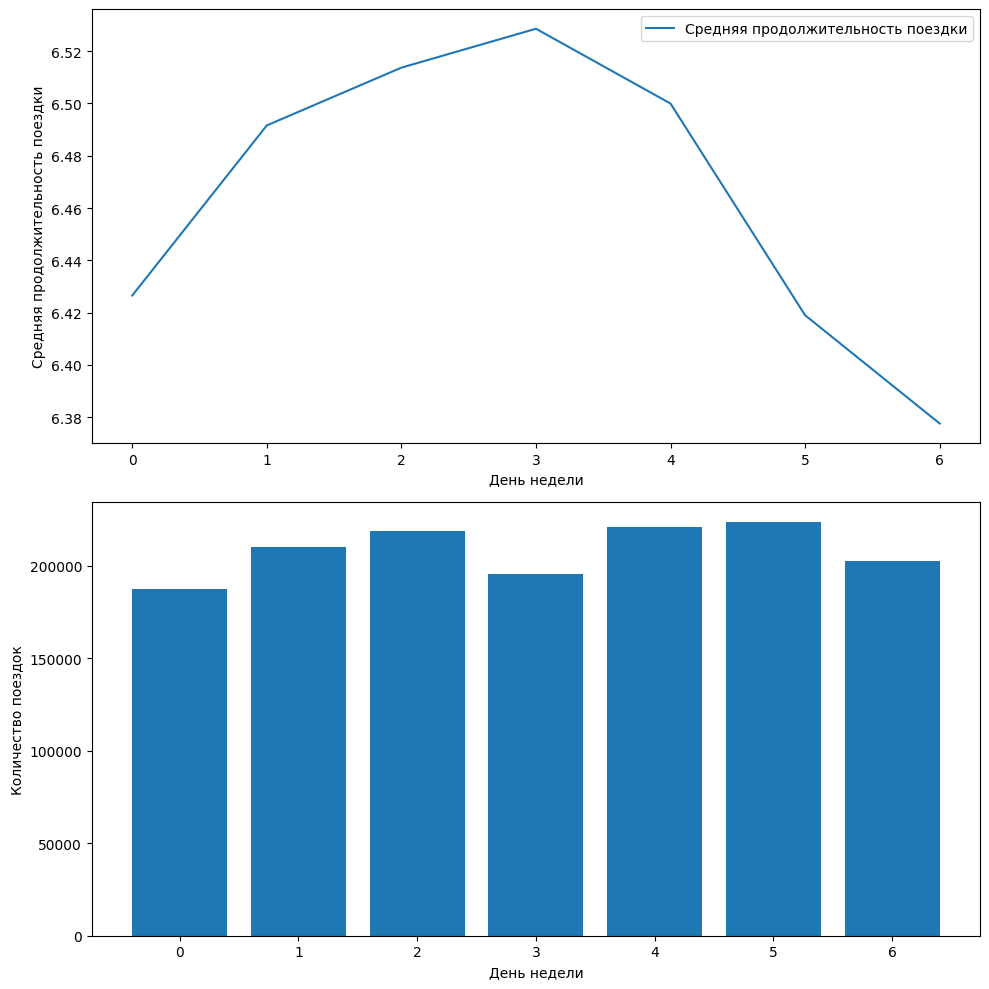

In [9]:
import matplotlib.pyplot as plt

# Создаем объекты для двух подграфиков
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Настраиваем первый подграфик
axs[0].plot(processed_data.groupby('day_of_week').mean()['log_trip_duration'], label='Средняя продолжительность поездки')
axs[0].set_xlabel('День недели')
axs[0].set_ylabel('Средняя продолжительность поездки')
axs[0].legend()

# Настраиваем второй подграфик
axs[1].bar(processed_data['day_of_week'].unique(), processed_data.groupby('day_of_week').count()['vendor_id'])
axs[1].set_xlabel('День недели')
axs[1].set_ylabel('Количество поездок')

# Устанавливаем плотное размещение подграфиков
plt.tight_layout()

# Отображаем график
plt.show()


Здесь мы видим, что продолжительность поездок сильно осцилируется в течение недели при этом среднее количество поездок в день недели меняется достаточно немного.
Понедельник и Четверг - дни с наименьшим количеством поездок, среда, пятница и суббота - с наибольшим.

Так как наш таргет предсказания - продолжительность поездки, то мы можем сделать вывод, что **день недели сильно влияет на продолжительность поездки** и мы должны включить этот признак в нашу модель.

Как дополнительную гипотезу можно вывести то, что в четверг может быть меньше поездок из за больших пробок в городе, так как мы видим, что в этот день недели средняя продолжительность поездки самая большая.

### Количество поездок/Средняя продолжительность поездки vs время суток

C:\Users\aefim\AppData\Local\Temp\ipykernel_29620\3366902163.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  axs[0].plot(processed_data.groupby('hour').mean()['log_trip_duration'], label='Средняя продолжительность поездки')


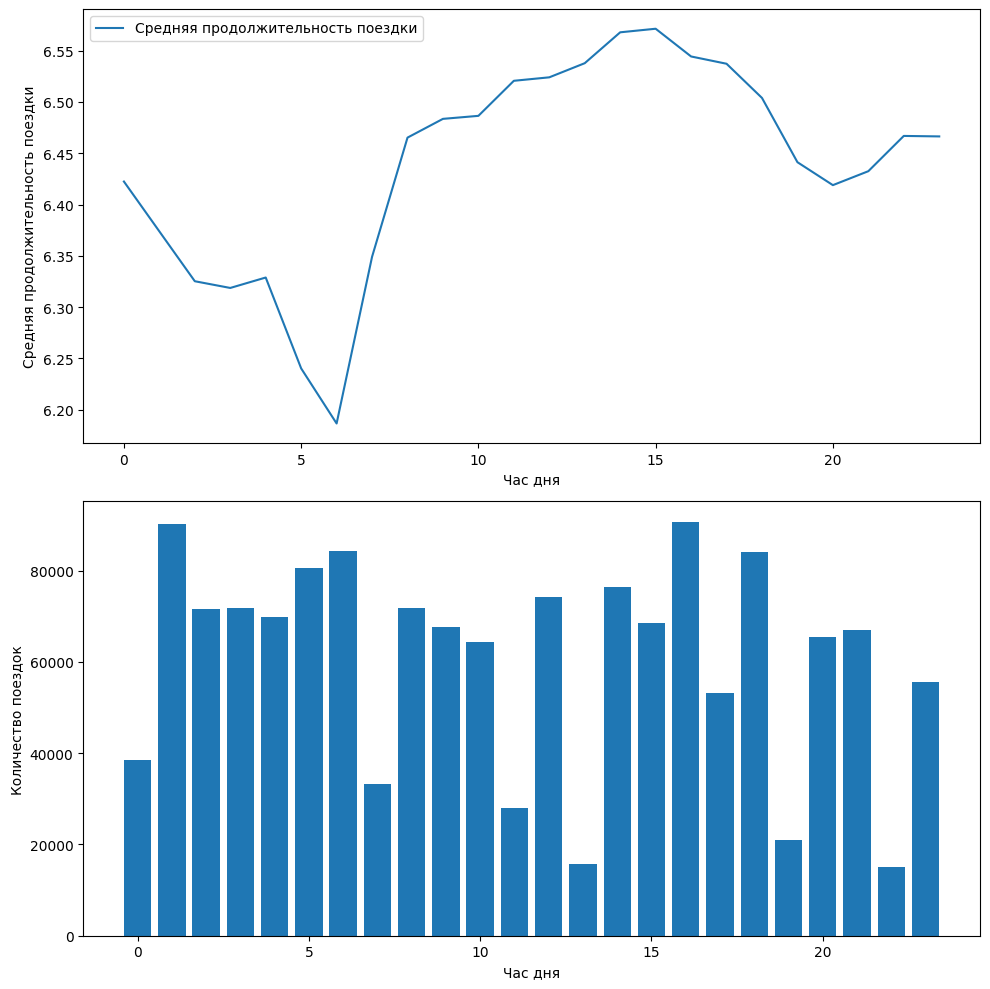

In [10]:
# Создаем объекты для двух подграфиков
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Настраиваем первый подграфик
axs[0].plot(processed_data.groupby('hour').mean()['log_trip_duration'], label='Средняя продолжительность поездки')
axs[0].set_xlabel('Час дня')
axs[0].set_ylabel('Средняя продолжительность поездки')
axs[0].legend()

# Настраиваем второй подграфик
axs[1].bar(processed_data['hour'].unique(), processed_data.groupby('hour').count()['vendor_id'])
axs[1].set_xlabel('Час дня')
axs[1].set_ylabel('Количество поездок')

# Устанавливаем плотное размещение подграфиков
plt.tight_layout()

# Отображаем график
plt.show()

Из первого графика можно вывести то, что продолжительность поездки сильно осцилирует в течение дня, а количество поездок меняется достаточно немного.

При этом, средняя продолжительность поездки в 6 утра самая маленькая, а в 15 часов - самая большая.

### Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)

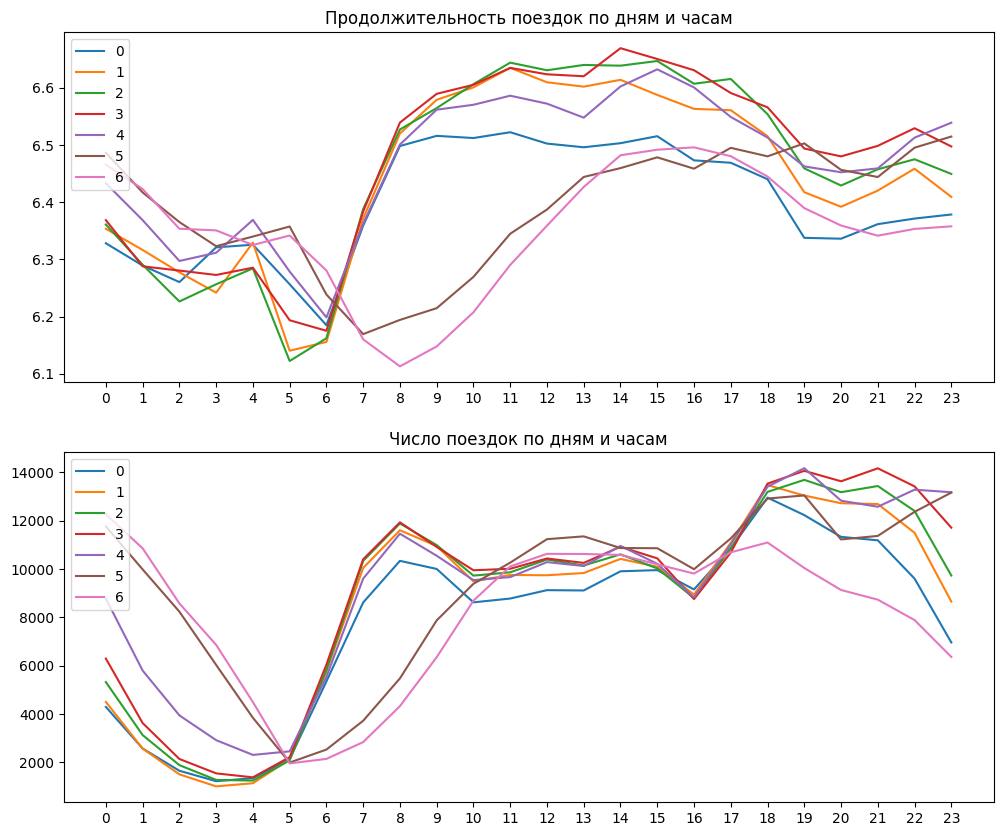

In [11]:
hour_week_duration = processed_data.groupby(['hour','day_of_week']).log_trip_duration.mean().reset_index()
hour_week_count = processed_data.groupby(['hour','day_of_week']).log_trip_duration.count().reset_index()

fig = plt.figure()

fig.set_size_inches(12, 10)

ax_1 = fig.add_subplot(2, 1, 1)
for day in hour_week_duration.day_of_week.unique():
    plt.plot('hour','log_trip_duration', data=hour_week_duration.query('day_of_week == @day'), label=day)
plt.legend(loc="upper left")
plt.xticks(hour_week_duration.hour.unique())
plt.title('Продолжительность поездок по дням и часам')

ax_2 = fig.add_subplot(2, 1, 2)
for day in hour_week_count.day_of_week.unique():
    plt.plot('hour','log_trip_duration', data=hour_week_count.query('day_of_week == @day'), label=day)
plt.legend(loc="upper left")
plt.xticks(hour_week_count.hour.unique())
plt.title('Число поездок по дням и часам')

plt.show()

<ing src="https://i.imgur.com/zMFkVQE.png" width="500">

### Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.

In [45]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


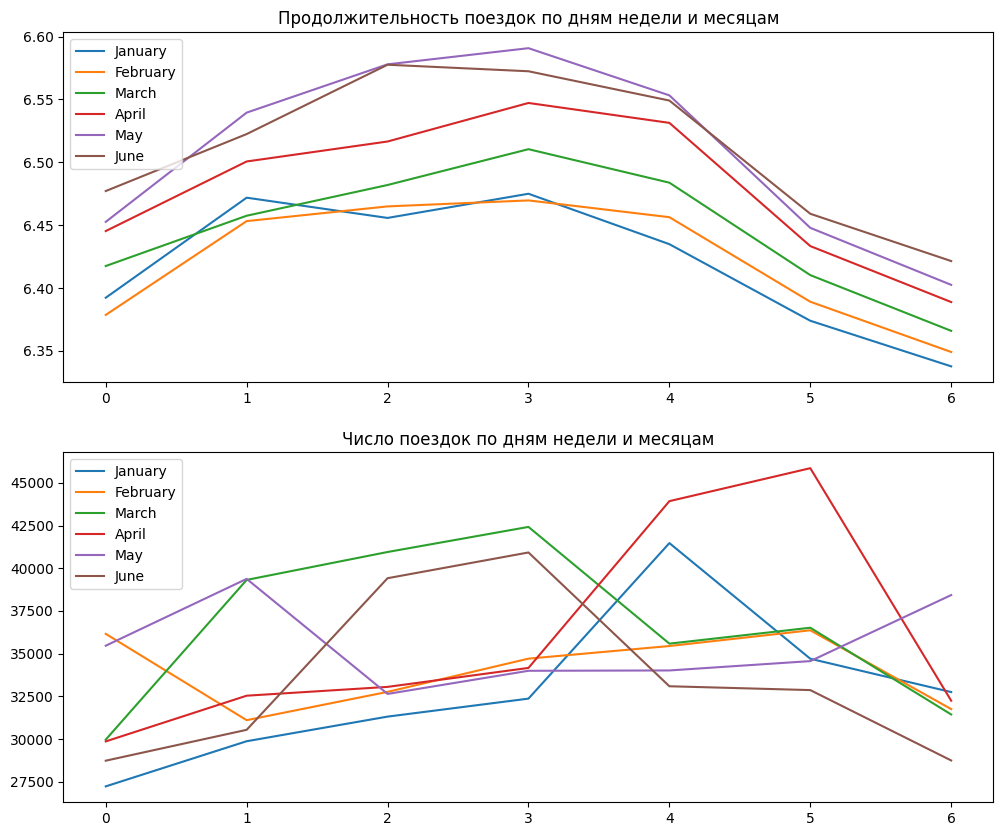

In [50]:
months = range(1, 13)
day_month_duration = processed_data.groupby(['day_of_week', 'month']).log_trip_duration.mean().reset_index()
day_month_duration = day_month_duration[day_month_duration['month'].isin(months)]
day_month_count = processed_data.groupby(['day_of_week', 'month']).log_trip_duration.count().reset_index()
day_month_count = day_month_count[day_month_count['month'].isin(months)]

# create a dictionary to map month numbers to month names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July'}

# apply mapping to 'month' column in day_month_duration and day_month_count DataFrames
day_month_duration['month'] = day_month_duration['month'].map(month_names)
day_month_count['month'] = day_month_count['month'].map(month_names)

fig = plt.figure()
fig.set_size_inches(12, 10)

ax_1 = fig.add_subplot(2, 1, 1)
for month in day_month_duration.month.unique():
    plt.plot('day_of_week', 'log_trip_duration', data=day_month_duration.query('month == @month'), label=month)
plt.legend(loc="upper left")
plt.xticks(day_month_duration.day_of_week.unique())
plt.title('Продолжительность поездок по дням недели и месяцам')

ax_2 = fig.add_subplot(2, 1, 2)
for month in day_month_count.month.unique():
    plt.plot('day_of_week', 'log_trip_duration', data=day_month_count.query('month == @month'), label=month)
plt.legend(loc="upper left")
plt.xticks(day_month_count.day_of_week.unique())
plt.title('Число поездок по дням недели и месяцам')

plt.show()


### Ящики с усами для различных: времени суток, дня недели, месяца

<img src="https://media.discordapp.net/attachments/1004748557477224498/1080102509143662682/MAD_Boxes_with_mustaches_f77d22e0-e976-432e-b87b-3eea2bde2253.png?width=356&height=533" width="200">

Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [12]:
### Создадим первый бинарный признак
### Your code is here


In [13]:
### Создадим второй бинарный признак
### Your code is here

In [14]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [15]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [16]:
### Делаем OneHotEncoding и конкатим с processed_data


for col in ['day_of_week', 'hour', 'month']:
    
    ### Your code is here

SyntaxError: incomplete input (997736220.py, line 6)

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

<img src="https://media.discordapp.net/attachments/1004748557477224498/1080103863476027442/MAD_wooden_Boxes_with_mustaches_representing_each_month_ba254e48-ca0d-45e1-9a33-b9305e6003d0.png?width=1003&height=668" width="500">

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [ ]:
### Your code is here



In [ ]:
processed_data.head()

In [ ]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here


In [ ]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here


In [ ]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

